In [1]:
# To predict the BMI or Body Mass Index of an individual using Support Vector Machine algorithm
# SVM creates a hyper plane which divides the data into parts and observes in which part the input data falls in
# If data is linearly indistinguishable, the data is transformed into 3d form and a plane is created to 'cut' the data

In [26]:
import numpy as np # to determine BMI
import pandas as pd
import seaborn as sns
df = pd.read_csv("C:\\Users\\sameer\\Desktop\\PersonGender.csv",delimiter = ',',encoding = 'ISO-8859-1')
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [27]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [28]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [29]:
# One of the input required ('Gender') is in a object form, we need to turn it into categorical data (i.e- 0,1)

In [30]:
gender = LabelEncoder()
df['Gender'] = gender.fit_transform(df['Gender']) # fit the LabelEncoder and return the encoded values
df.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [31]:
# Out output variable ('Index') is in the form of integer or continuous value, we need to 
# convert it into a range and categorize it with the help of 'cut' function

In [32]:
bins = [-1, 0, 1, 2, 3, 4, 5] # the index values is converted into a categorical string also bins or ranges +1 than labels
health = ['Malnourish','UnderWeight', 'Fit', 'Slightly OverWeight', 'OverWeight', 'Extremely Overweight']
df['Index'] = pd.cut(df['Index'], bins = bins, labels = health)
df.head()

,Gender,Height,Weight,Index
0,1,174,96,OverWeight
1,1,189,87,Fit
2,0,185,110,OverWeight
3,0,195,104,Slightly OverWeight
4,1,149,61,Slightly OverWeight


In [33]:
df['Index'].value_counts()

Extremely Overweight    198
OverWeight              130
Fit                      69
Slightly OverWeight      68
UnderWeight              22
Malnourish               13
Name: Index, dtype: int64

In [34]:
df['Gender'].value_counts()

0    255
1    245
Name: Gender, dtype: int64

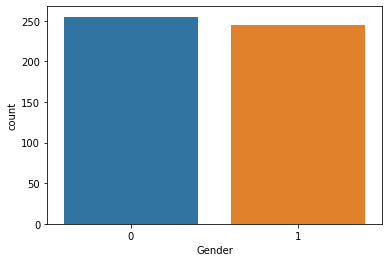

In [35]:
sns.countplot(df['Gender'])

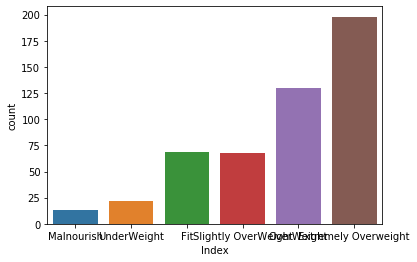

In [36]:
sns.countplot(df['Index'])

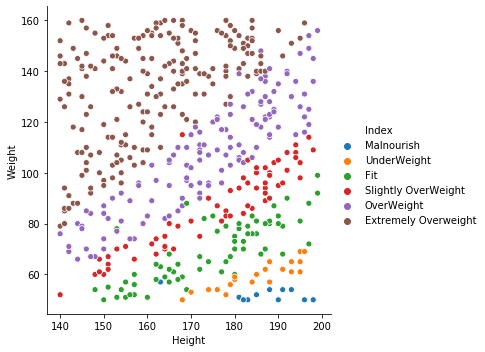

In [37]:
sns.relplot(x = 'Height', y = 'Weight', hue = 'Index', data = df)

In [38]:
# graph is split clearly according to height and weight ratio

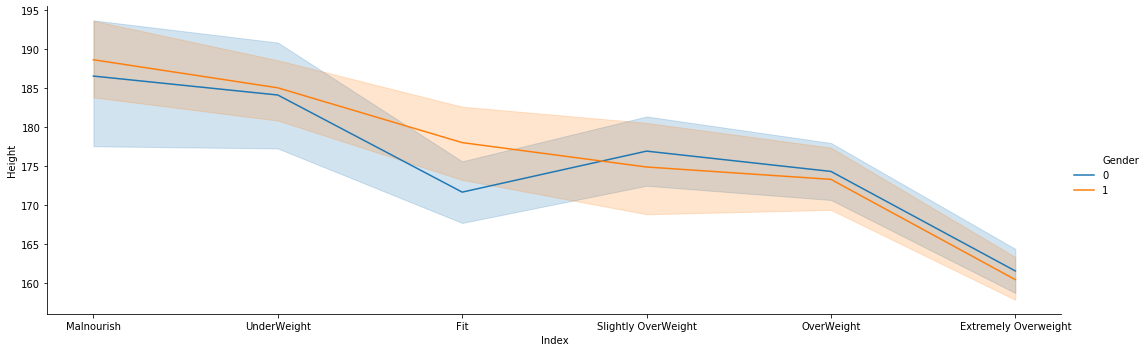

In [39]:
sns.relplot(x ='Index', y = 'Height', hue='Gender',kind = 'line',data = df, height = 5, aspect =3)

In [47]:
# Time to make model by splitting the data into train and test forms
x = df.drop('Index', axis=1)
y = df['Index']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [48]:
clf = svm.SVC() # SVC = support vector classifier
clf.fit(x_train,y_train)
pred = clf.predict(x_test)

In [49]:
print(classification_report(y_test,pred))

                      precision    recall  f1-score   support

Extremely Overweight       0.89      0.96      0.92        57
                 Fit       0.75      0.75      0.75        16
          Malnourish       0.00      0.00      0.00         4
          OverWeight       0.90      0.83      0.86        46
 Slightly OverWeight       0.79      0.83      0.81        23
         UnderWeight       0.50      0.75      0.60         4

            accuracy                           0.85       150
           macro avg       0.64      0.69      0.66       150
        weighted avg       0.83      0.85      0.84       150



C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
print(confusion_matrix(y_test,pred))

[[55  0  0  2  0  0]
 [ 0 12  0  0  4  0]
 [ 0  1  0  0  0  3]
 [ 7  0  0 38  1  0]
 [ 0  2  0  2 19  0]
 [ 0  1  0  0  0  3]]


In [51]:
print(accuracy_score(y_test,pred))

0.8466666666666667


In [56]:
# testing the classifier with an example
a = [[1,160,80]] # Male, Height, Weight
a = s.transform(a)
b = clf.predict(a)
b

array(['Slightly OverWeight'], dtype=object)